In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
def RandomNumExp(dist = 'norm', params = (0, 1), n = 1000, bins = 10):
    '''
    說明本程式碼的功能
    dist: 'norm', 't', 'chi2'
    params: 依照dist的不同而有不同的參數需求
        norm: (mean, std)
        t: (df,)
        chi2: (df,)
    n: 產生亂數的個數
    bins: 直方圖的組距數
    '''
    if dist == 'norm':
        xx= np.linspace(-4, 4, 100)
        x = stats.norm.rvs(loc = params[0], scale = params[1], size = n)
        yy = stats.norm.pdf(xx, loc = params[0], scale = params[1])
        Y_ = stats.norm.cdf(xx, loc = params[0], scale = params[1])
    if dist == 't':
        xx= np.linspace(-4, 4, 100)
        x = stats.t.rvs(df = params[0], size = n)
        yy = stats.t.pdf(xx, df = params[0])
        Y_ = stats.t.cdf(xx, df = params[0])
    if dist == 'chi2':
        xx= np.linspace(0, 10, 100)
        x = stats.chi2.rvs(df = params[0], size = n)
        yy = stats.chi2.pdf(xx, df = params[0])
        Y_ = stats.chi2.cdf(xx, df = params[0])
    
    
    fig, ax = plt.subplots(2, 2, figsize = (12, 8))
    # 直方圖
    ax[0,0].hist(x, bins = bins, density = True, alpha = 0.6,\
                  color = 'b', edgecolor = 'y', linewidth = 1)
    
    ax[0,0].plot(xx, yy, color = 'r', linestyle = '--', \
                 linewidth = 3, alpha = 0.8, label = 'real pdf')
    ax[0,0].legend()
    ax[0,0].set_title('Histogram')
    # 盒鬚圖
    ax[0,1].boxplot(x, notch = True, vert = True, labels = ['X'])
    ax[0,1].grid(True)
    ax[0,1].set_title('Boxplot')
    # 機率圖
    stats.probplot(x, dist = "norm", plot = ax[1,0])
    ax[1,0].grid(True)
    ax[1,0].set_title('Probability plot')
    # 經驗累積密度函數
    x = np.sort(x)
    Y = np.arange(1, n+1) / n
    ax[1,1].plot(x, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
    # Y_ = stats.t.cdf(x, df = df)
    ax[1,1].plot(xx, Y_, color = 'r', linestyle = '--',
        linewidth = 5, alpha = 0.5, label = 'real CDF')
    ax[1,1].legend(), ax[1,1].grid(True)
    ax[1,1].set_title('The Empirical CDF ')
    # set title for the whole figure
    fig.suptitle(f'Distribution: {dist}, params: {params}, n: {n}, bins: {bins}', fontsize = 16)
    plt.show()

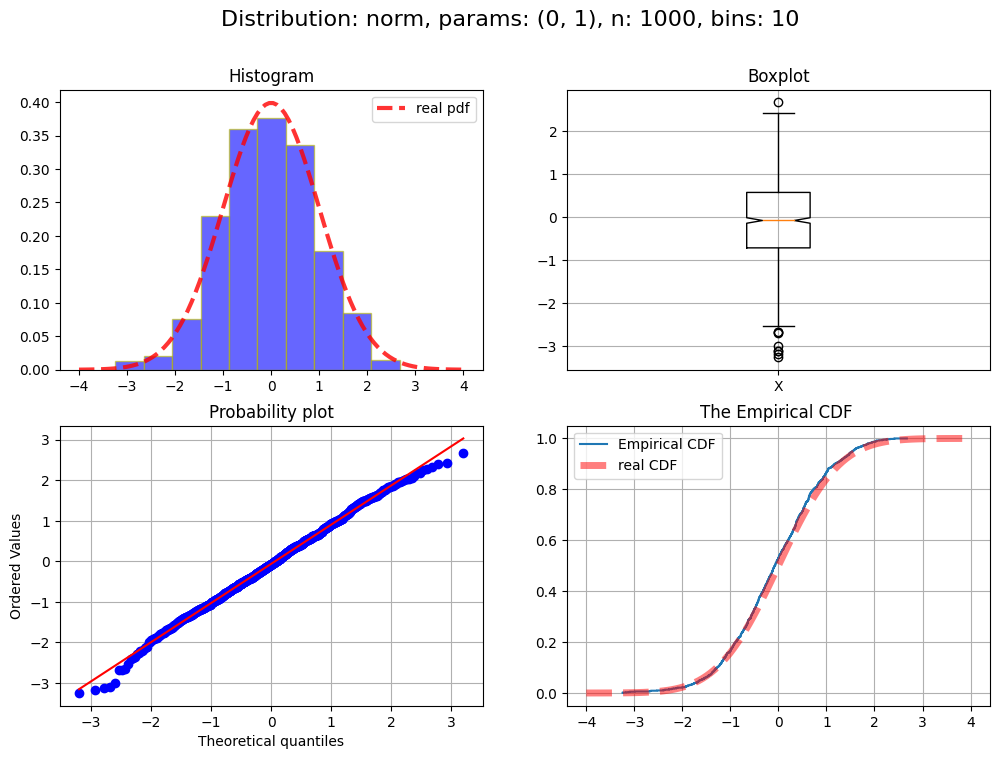

In [5]:
RandomNumExp(dist = 'norm', params = (0, 1), n = 1000, bins = 10)


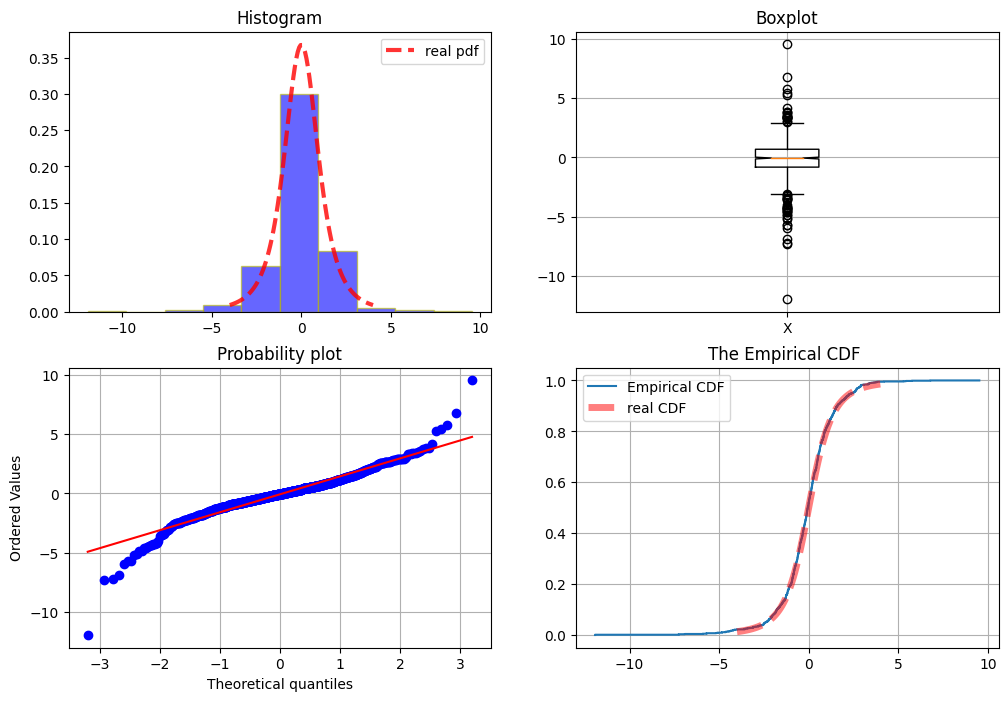

In [19]:
RandomNumExp(dist = 't', params = (3, 1), n = 1000, bins = 10)


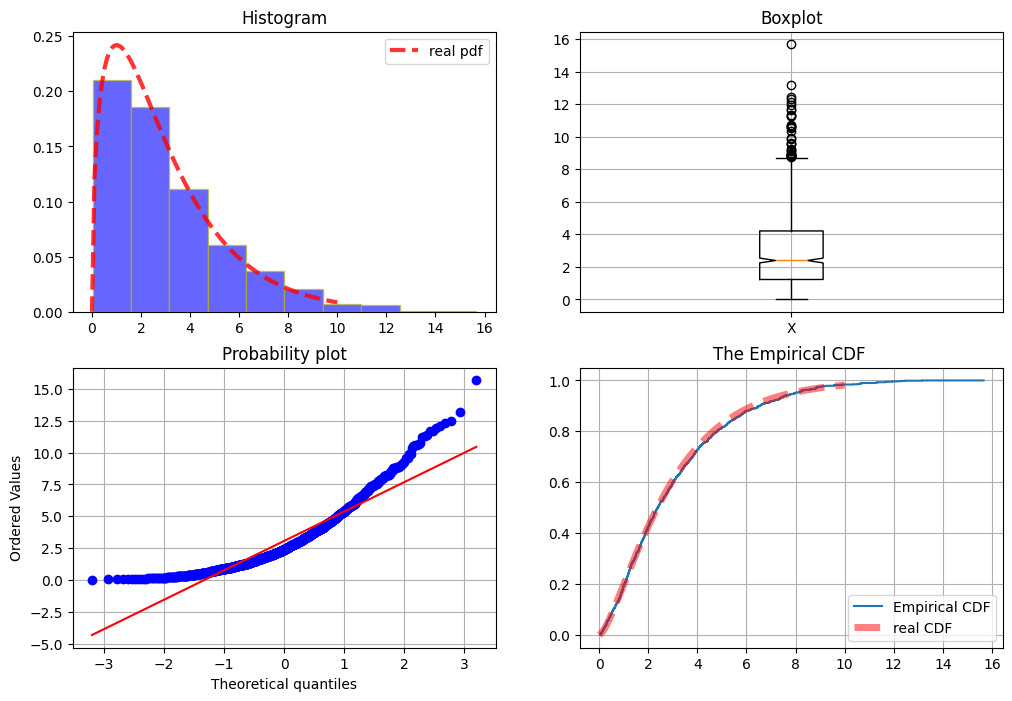

In [20]:
RandomNumExp(dist = 'chi2', params = (3,), n = 1000, bins = 10)

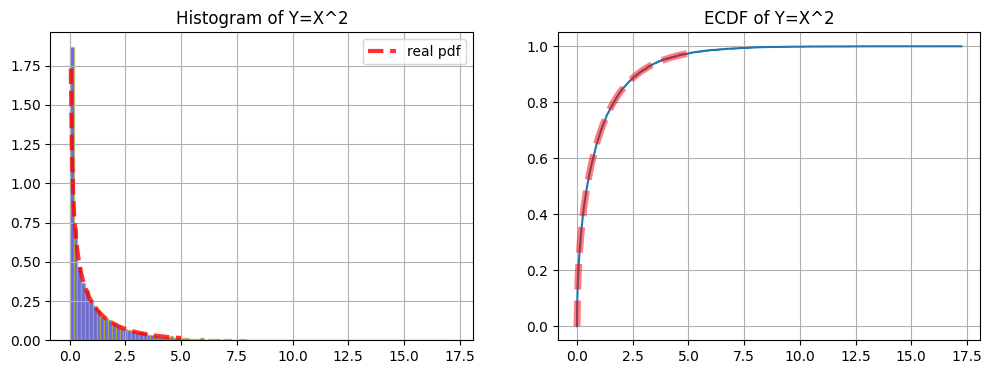

In [26]:
# do the sampling distribution experiment for Y=X^2
n =10000
x = stats.norm.rvs(loc = 0, scale = 1, size = n)
y = x**2

fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].hist(y, bins = 100, density = True, alpha = 0.6,\
              color = 'b', edgecolor = 'y', linewidth = 1)
# draw the real pdf
xx= np.linspace(0, 5, 100)
yy = stats.chi2.pdf(xx, df = 1)
ax[0].plot(xx, yy, color = 'r', linestyle = '--', \
            linewidth = 3, alpha = 0.8, label = 'real pdf')
ax[0].legend()
ax[0].set_title('Histogram of Y=X^2')
ax[0].grid(True)
# Emperical CDF
y_sorted = np.sort(y)
Y = np.arange(1, n+1) / n

ax[1].plot(y_sorted, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
Y_ = stats.chi2.cdf(xx, df = 1)
ax[1].plot(xx, Y_, color = 'r', linestyle = '--',
    linewidth = 5, alpha = 0.5, label = 'real CDF')
# ax[1].boxplot(y, notch = True, vert = True, labels = ['Y'])
ax[1].grid(True)
ax[1].set_title('ECDF of Y=X^2')
plt.show()


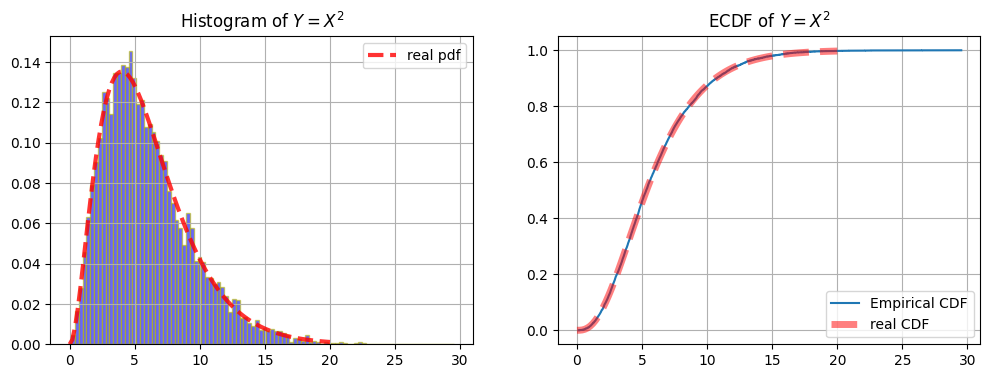

In [30]:
# Y = chi2(2) + chi2(4) = chi2(6)
n =10000
x1 = stats.chi2.rvs(df = 2, size = n)
x2 = stats.chi2.rvs(df = 4, size = n)
y = x1 + x2
# --- IGNORE ---
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].hist(y, bins = 100, density = True, alpha = 0.6,\
              color = 'b', edgecolor = 'y', linewidth = 1)
# draw the real pdf
xx= np.linspace(0, 20, 100)
yy = stats.chi2.pdf(xx, df = 6)
ax[0].plot(xx, yy, color = 'r', linestyle = '--', \
            linewidth = 3, alpha = 0.8, label = 'real pdf')
ax[0].legend()
ax[0].set_title('Histogram of $Y=X^2$')
ax[0].grid(True)
# Emperical CDF
y_sorted = np.sort(y)
Y = np.arange(1, n+1) / n

ax[1].plot(y_sorted, Y, drawstyle = 'steps-pre', label = 'Empirical CDF')
Y_ = stats.chi2.cdf(xx, df = 6)
ax[1].plot(xx, Y_, color = 'r', linestyle = '--',
    linewidth = 5, alpha = 0.5, label = 'real CDF')
# ax[1].boxplot(y, notch = True, vert = True, labels = ['Y'])
ax[1].grid(True)
ax[1].legend()
ax[1].set_title('ECDF of $Y=X^2$')
plt.show()
